![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## **ENTREGABLE 1:** Data Preparation - BMW Pricing
## **INTEGRANTES DEL GRUPO:** Lluís Miarnau, Ariadna Rubió, Sergio Vásquez y David Larré

____

## **INTRODUCCIÓN**

En este proyecto se trabajará con un dataset de vehículos BMW, el objetivo final es predecir el precio de los coches en función de diversas variables disponibles.

Se realizará una exploración, limpieza y transformación completa de los datos para prepararlos adecuadamente para el modelo predictivo.

## **COLUMNAS**

 Columna                          | Descripción |
|----------------------------------|-------------|
| **marca**                        | Marca del vehículo (en este caso, `BMW` o vacíos). |
| **modelo**                       | Modelo específico del coche (por ejemplo, `118`, `M4`, `320`...). |
| **km**                           | Kilómetros recorridos por el vehículo (indicador del uso). |
| **potencia**                     | Potencia del motor en caballos (CV). |
| **fecha_registro**               | Fecha en que se matriculó por primera vez el coche. |
| **tipo_gasolina**                | Tipo de combustible que utiliza el vehículo (`diesel`, `petrol`, etc.). |
| **color**                        | Color del coche (`black`, `white`, etc.). |
| **tipo_coche**                   | Tipo de carrocería (`convertible`, `coupe`, etc.). |
| **volante_regulable**            | Indica si el coche tiene volante ajustable (`True` / `False`). |
| **aire_acondicionado**           | Indica si el coche tiene aire acondicionado (`True` / `False`). |
| **camara_trasera**               | Indica si el coche tiene cámara de marcha atrás (`True` / `False`). |
| **asientos_traseros_plegables**  | Indica si los asientos traseros pueden plegarse (`True` / `False`). |
| **elevalunas_electrico**         | Indica si los elevalunas son eléctricos (`True` / `False`). |
| **bluetooth**                    | Indica si el vehículo dispone de conexión Bluetooth (`True` / `False`). |
| **gps**                          | Indica si el vehículo incluye sistema de navegación GPS (`True` / `False`). |
| **alerta_lim_velocidad**         | Indica si tiene alerta de límite de velocidad (`True` / `False`). |
| **precio**                       | Precio de venta en euros (€). Es la variable objetivo (**target**). |
| **fecha_venta**                  | Fecha en la que se vendió el coche. |

## **00 - IMPORTACIÓN DE LIBRERÍAS**

Hacemos la importación de las librerías pandas, numpy, matplotlib.pyplot, plotly,graph_objects, seaborn, sklearn y warnings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

print('Librerías importadas correctamente')

Librerías importadas correctamente


## **01 - IMPORTACIÓN DE DATOS**


 Importamos los datos, realizamos una copia para guardar una versión original de los datos y mostramos el número de filas y columnas.

In [2]:
bmw = pd.read_csv('/Users/davidlarre/Desktop/PROYECTOS/ENTREGABLE 1/data/bmw_pricing.csv')
df_bmw = bmw.copy()

print(f'Hay {df_bmw.shape[0]} filas y {df_bmw.shape[1]} columnas') 

Hay 4843 filas y 18 columnas


## **02 - OBSERVACIÓN DE LOS DATOS**

Realizamos una exploración preliminar de los datos  con el objetivo de comprender su estructura y detectar posibles inconsistencias.

In [3]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [4]:
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [5]:
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [6]:
# Listamos el nombre de todas las columnas
print("Columnas :", df_bmw.columns.tolist())

Columnas : ['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta']


In [7]:
# Creamos una función para crear un DataFrame con la cantidad de nulos, el porcentaje de nulos y los valores únicos de cada columna. Ordenaremos el df por el porcentaje de nulos.

def tabla_nulos(dataset):
    nulos = dataset.isnull().sum()
    porcentaje = dataset.isnull().mean() * 100
    unicos = dataset.nunique()
    
    df_nulos = pd.DataFrame({
        'NULOS': nulos,
        '% NULOS': porcentaje,
        'VALORES UNICOS': unicos
        }).sort_values(by='% NULOS', ascending=False)
    return df_nulos
    
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3391,70.018584,2
fecha_registro,2423,50.030973,180
tipo_coche,1460,30.146603,8
marca,970,20.028908,1
alerta_lim_velocidad,728,15.032005,2
bluetooth,728,15.032005,2
aire_acondicionado,486,10.035102,2
color,445,9.188520,10
precio,6,0.123890,437
tipo_gasolina,5,0.103242,5


### **OBSERVACIONES**

- `fecha_registro` y `fecha_venta` no tienen formato de fecha.

- `marca` solo tiene **1** valor único.

- `asientos_traseros_plegables`, `alerta_lim_velocidad`, `bluetooth`, `aire_acondicionado`, `volante_regulable`, `camara_trasera`, `elevalunas_electrico`, `gps` sus valores son True/False y no tienen formato boolean.

- `precio` presenta valores nulos, al ser la variable target podría afectar al modelo predictivo. si no los tratamos adecuadamente.


## **03 - PREPROCESAMIENTO DE DATOS**


### **CAMBIO DE COLUMNAS OBJECT POR FECHA**

In [8]:
# Se modifica el dtype de las columnas 'fecha_registro' y 'fecha_venta' a datetime
for i in ['fecha_registro','fecha_venta']:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
# Comprobamos el cambio de dtype.
print(df_bmw[['fecha_registro','fecha_venta']].dtypes)

fecha_registro    datetime64[ns]
fecha_venta       datetime64[ns]
dtype: object


### **COMPROBACIÓN DE VALORES DUPLICADOS**

In [9]:
# Comprobamos si hay duplicados
print("Duplicados :", df_bmw.duplicated().sum(), "valores duplicados")

Duplicados : 0 valores duplicados


### **CREACIÓN FUNCIÓN DISTRIBUCIONES**

In [10]:
# Creamos una función que devuelve el diccionario 'distribuciones' con el porcentaje de distribución de los valores de cada columna respecto al total

def diccionario_distribuciones(dataset):
    distribuciones = {}  # Lo creas dentro
    for i in dataset:
        distribuciones[i] = dataset[i].value_counts(normalize=True, dropna=False)
    return distribuciones

distribuciones = diccionario_distribuciones(df_bmw)

### **CREACIÓN DE NUEVAS COLUMNAS**

In [11]:
# Consideramos que las fechas completas no aportan información relevante, por lo que vamos a crear nuevas columnas solo con el año
df_bmw['año_registro'] = df_bmw['fecha_registro'].dt.year
df_bmw['año_venta'] = df_bmw['fecha_venta'].dt.year

# Creamos una columna para identificar los años de antigüedad del coche
df_bmw['años_coche'] = df_bmw['año_venta'] - df_bmw['año_registro']

# Comprobamos que se han creado correctamente
df_bmw[['año_registro','año_venta','años_coche']].head(10)

,año_registro,año_venta,años_coche
0,2012.0,2018.0,6.0
1,NaN,2018.0,NaN
2,2012.0,2018.0,6.0
3,NaN,2018.0,NaN
4,NaN,2018.0,NaN
5,2011.0,2018.0,7.0
6,NaN,2018.0,NaN
7,2009.0,2018.0,9.0
8,NaN,2018.0,NaN
9,NaN,2018.0,NaN


### **CREACIÓN DATAFRAME PARA COMPARACIÓN DE DISTRIBUCIONES**

In [12]:
# Creamos una cópia del df para posteriormente hacer comparaciones de las distribuciones de las variables antes de imputar los nulos y después
df_antes = df_bmw.copy()

### **ELMINACIÓN DE FILAS/COLUMNAS NO ÚTILES PARA EL MODELO**

#### **FILAS**

##### **FILAS FECHAS**

In [13]:
# Buscamos si hay fechas registro que son posteriores a la fecha de venta
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,...,NaN,True,False,True,NaN,8200.0,2010-04-01,2011.0,2010.0,-1.0
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,NaN,...,NaN,False,False,True,False,8800.0,2008-06-01,2013.0,2008.0,-5.0


In [14]:
# Hemos encontrado dos registros con fechas de registro posteriores a la fecha de venta, lo cual no es posible. Guardamos sus índices y eliminamos las filas del dataset
indice_fechas = df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']].index
df_bmw = df_bmw.drop(index=indice_fechas)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche


##### **FILA KM**

In [15]:
# Hemos visto con .describe valores negativos en la columna 'km'
df_bmw[df_bmw['km'] < 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
2938,NaN,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,...,NaN,False,False,True,True,75000.0,2018-04-01,NaN,2018.0,NaN


In [16]:
# Hay un registro con km negativos, lo cual no es posible. Guardamos su índice y eliminamos la fila del dataset.
indice_negativos = df_bmw[df_bmw['km'] < 0].index
df_bmw = df_bmw.drop(index=indice_negativos)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['km'] < 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche


##### **FILAS POTENCIA**

In [17]:
# Hemos visto con .describe valores a 0, también buscamos potencias inferiores a 50 cv en la columna 'potencia
df_bmw[df_bmw['potencia'] < 50]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
1796,BMW,i3,152328.0,25.0,NaT,hybrid_petrol,black,NaN,False,True,...,NaN,False,False,True,NaN,20300.0,2018-04-01,NaN,2018.0,NaN
1925,BMW,i3,152470.0,25.0,NaT,hybrid_petrol,black,hatchback,False,True,...,NaN,False,False,True,True,15500.0,2018-03-01,NaN,2018.0,NaN
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,...,False,False,False,False,NaN,11700.0,2018-03-01,2014.0,2018.0,4.0


In [18]:
# Hay tres registros con potencia 0 o con valores erroneos (comprobado a nivel negocio que no existe el modelo i3 con 25 de potencia como el total de su potencia). 
# Guardamos sus índices y eliminamos las filas del dataset.
indice_potencia = df_bmw[df_bmw['potencia'] < 50].index
df_bmw = df_bmw.drop(index=indice_potencia)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['potencia'] < 50]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche


#### **PRECIOS - MIRAR SI HAY QUE HACER ALGO**

In [19]:
# Buscamos precios que sean inferiores a 300
print("PRECIOS INFERIORES A 300:", (df_bmw['precio'] < 300).sum())
df_bmw[df_bmw['precio'] < 300]

PRECIOS INFERIORES A 300: 10


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
565,NaN,320,179358.0,120.0,2013-06-01,diesel,black,NaN,False,True,...,NaN,False,False,True,True,100.0,2018-03-01,2013.0,2018.0,5.0
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,...,NaN,False,False,False,True,100.0,2018-03-01,2014.0,2018.0,4.0
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,...,NaN,False,False,False,True,100.0,2018-04-01,2014.0,2018.0,4.0
1255,BMW,320,170381.0,135.0,NaT,diesel,silver,NaN,True,True,...,NaN,False,False,True,False,100.0,2018-05-01,NaN,2018.0,NaN
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,...,NaN,False,False,True,NaN,100.0,2018-03-01,2014.0,2018.0,4.0
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,NaN,sedan,False,NaN,...,False,False,False,True,NaN,200.0,2018-08-01,1997.0,2018.0,21.0
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,NaN,...,False,False,NaN,True,False,200.0,2018-08-01,1997.0,2018.0,21.0
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,...,False,False,False,True,False,200.0,2018-08-01,1997.0,2018.0,21.0
2829,BMW,525,439060.0,105.0,NaT,diesel,silver,NaN,False,False,...,NaN,False,False,True,False,100.0,2018-03-01,NaN,2018.0,NaN
4356,BMW,X3,79685.0,190.0,2014-02-01,diesel,black,suv,False,False,...,NaN,False,False,False,NaN,100.0,2018-05-01,2014.0,2018.0,4.0


In [20]:
# Buscamos precios que sean superiores a 150000
print("PRECIOS SUPERIORES A 150000:", (df_bmw['precio'] > 150000).sum())
df_bmw[df_bmw['precio'] > 150000]

PRECIOS SUPERIORES A 150000: 1


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
4753,BMW,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,...,NaN,False,NaN,False,True,178500.0,2018-08-01,2013.0,2018.0,5.0


#### **COLUMNAS**

In [21]:
# Hacemos un print para mostrar las distribuciones que tienen más del 90% de un mismo valor respecto al total, para valorar si eliminarlas

for i in distribuciones:
    if (distribuciones[i] > 0.9).any():
        print(distribuciones[i][distribuciones[i] > 0.9],"\n")

tipo_gasolina
diesel    0.956225
Name: proportion, dtype: float64 

gps
True    0.932067
Name: proportion, dtype: float64 



##### **COLUMNA MARCA**

El dataset se presenta bajo el nombre bmw_pricing, lo que sugiere que todos los registros corresponden a vehículos de la marca BMW, es importante confirmar esta suposición en lugar de asumirla. Por eso, realizaremos un breve análisis para verificar si los modelos que aparecen con la columna de marca vacía también están asociados a la marca BMW en otras filas del dataset.

In [22]:
# Filtramos las filas donde la columna marca está vacía
modelos_nulos = df_bmw[df_bmw['marca'].isna()]

# Filtramos las filas donde la columna marca no está vacía 
modelos_nonulos = df_bmw[df_bmw['marca'].notna()]

# Comprobamos todos los modelos con marca nula que NO aparecen en los registros con marca no nula
modelos_a_comprobar = modelos_nulos[~modelos_nulos['modelo'].isin(modelos_nonulos['modelo'])]

modelos_a_comprobar

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,año_registro,año_venta,años_coche
57,NaN,M235,34082.0,240.0,NaT,petrol,grey,coupe,False,True,...,False,True,True,True,NaN,30200.0,2018-01-01,NaN,2018.0,NaN
84,NaN,M235,69736.0,240.0,NaT,petrol,grey,NaN,True,True,...,False,True,True,True,False,30000.0,2018-05-01,NaN,2018.0,NaN
102,NaN,M235,37619.0,240.0,NaT,petrol,black,NaN,True,False,...,NaN,True,True,True,True,27700.0,2018-05-01,NaN,2018.0,NaN
107,NaN,630,149943.0,190.0,NaT,petrol,black,coupe,True,True,...,False,True,True,True,True,10500.0,2018-05-01,NaN,2018.0,NaN
4804,NaN,220 Active Tourer,153358.0,140.0,2015-06-01,diesel,grey,van,False,NaN,...,NaN,False,False,True,True,11700.0,2018-02-01,2015.0,2018.0,3.0
4825,NaN,225 Active Tourer,33300.0,170.0,NaT,petrol,NaN,van,True,True,...,NaN,False,False,False,True,19200.0,2018-05-01,NaN,2018.0,NaN


In [23]:
# Tenemos 6 registros que no hemos podido comprobar, vamos a observar los modelos únicos
modelos_a_comprobar['modelo'].unique()

array(['M235', '630', '220 Active Tourer', '225 Active Tourer'],
      dtype=object)

De los 6 registros, se identifican 4 modelos diferentes. Hemos comprobado que estos 4 modelos existen, los hemos encontrado en la página web de la marca. Como todos los registros son BMW, procederemos a eliminar la columna.

In [24]:
# Eliminamos la columna 'marca' ya que no aporta información relevante
df_bmw.drop(columns='marca',inplace=True)

# Comprobamos que hemos eliminado la columna
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4834 non-null   object        
 1   km                           4835 non-null   float64       
 2   potencia                     4836 non-null   float64       
 3   fecha_registro               2417 non-null   datetime64[ns]
 4   tipo_gasolina                4832 non-null   object        
 5   color                        4392 non-null   object        
 6   tipo_coche                   3379 non-null   object        
 7   volante_regulable            4833 non-null   object        
 8   aire_acondicionado           4352 non-null   object        
 9   camara_trasera               4835 non-null   object        
 10  asientos_traseros_plegables  1451 non-null   object        
 11  elevalunas_electrico         4835 non-null   obj

##### **COLUMNAS FECHAS**

In [25]:
# Eliminamos las siguiente columnas con fecha, las nueva columna edad consideramos que las engloba a todas
df_bmw.drop(columns=['fecha_registro','fecha_venta','año_registro','año_venta'], inplace=True)

# Comprobamos que se han eliminado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4834 non-null   object 
 1   km                           4835 non-null   float64
 2   potencia                     4836 non-null   float64
 3   tipo_gasolina                4832 non-null   object 
 4   color                        4392 non-null   object 
 5   tipo_coche                   3379 non-null   object 
 6   volante_regulable            4833 non-null   object 
 7   aire_acondicionado           4352 non-null   object 
 8   camara_trasera               4835 non-null   object 
 9   asientos_traseros_plegables  1451 non-null   object 
 10  elevalunas_electrico         4835 non-null   object 
 11  bluetooth                    4109 non-null   object 
 12  gps                          4837 non-null   bool   
 13  alerta_lim_velocidad   

##### **COLUMNA TIPO GASOLINA**

In [26]:
# Observamos la distribución de 'tipo_gasolina'
distribuciones['tipo_gasolina']

tipo_gasolina
diesel           0.956225
petrol           0.039438
hybrid_petrol    0.001652
NaN              0.001032
Diesel           0.001032
electro          0.000619
Name: proportion, dtype: float64

Observamos que la columna `tipo_gasolina` no aporta información relevante, ya que el **96%** de los coches utilizan `diésel`. Podemos asumir que prácticamente todos los vehículos del dataset son diésel. Por lo tanto, eliminamos la columna.

In [27]:
# Eliminamos la columna 'tipo_gasolina'
df_bmw.drop(columns='tipo_gasolina', inplace= True)

# Comprobamos que hemos eliminado la columna
df_bmw.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,años_coche
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,6.0
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,True,33400.0,NaN


##### **COLUMNA GPS**

In [28]:
# Observamos la distribución de 'gps'
distribuciones['gps']

gps
True     0.932067
False    0.067933
Name: proportion, dtype: float64

También observamos que la columna `gps` tiene un **93%** de valores `True`. Como estamos buscando atributos que aporten información útil para predecir el precio, eliminamos la columna.

In [29]:
# Eliminamos la columna 'gps'
df_bmw.drop(columns='gps', inplace= True)

# Comprobamos que hemos eliminado la columna
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4834 non-null   object 
 1   km                           4835 non-null   float64
 2   potencia                     4836 non-null   float64
 3   color                        4392 non-null   object 
 4   tipo_coche                   3379 non-null   object 
 5   volante_regulable            4833 non-null   object 
 6   aire_acondicionado           4352 non-null   object 
 7   camara_trasera               4835 non-null   object 
 8   asientos_traseros_plegables  1451 non-null   object 
 9   elevalunas_electrico         4835 non-null   object 
 10  bluetooth                    4109 non-null   object 
 11  alerta_lim_velocidad         4112 non-null   object 
 12  precio                       4831 non-null   float64
 13  años_coche             

## **04 - TRATAMIENTO DE NULOS**

### **GENÉRICO**

In [30]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3386,70.002067,2
años_coche,2420,50.031011,23
tipo_coche,1458,30.142650,8
bluetooth,728,15.050651,2
alerta_lim_velocidad,725,14.988629,2
aire_acondicionado,485,10.026876,2
color,445,9.199917,10
precio,6,0.124044,436
volante_regulable,4,0.082696,2
modelo,3,0.062022,76


In [31]:
# Creamos una función para eliminar columnas que tengan un umbral de nulos inferior a un valor

def elimina_nulos(dataset, umbral):
    lista_nulos = tabla_nulos(dataset)
    for i in lista_nulos.index:
        if lista_nulos['% NULOS'][i] < umbral:
            dataset.dropna(subset=[i], inplace=True)
    return dataset

In [32]:
# Ejecutamos la función para eliminar las columnas que tengan un porcentaje de nulos inferior al 1%
elimina_nulos(df_bmw, 1)

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche
0,118,140411.0,100.0,black,NaN,True,True,False,NaN,True,NaN,NaN,11300.0,6.0
1,M4,13929.0,317.0,grey,convertible,True,True,False,NaN,False,True,True,69700.0,NaN
2,320,183297.0,120.0,white,NaN,False,False,False,NaN,True,False,False,10200.0,6.0
3,420,128035.0,135.0,red,convertible,True,True,False,NaN,True,True,NaN,25100.0,NaN
4,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,33400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,black,NaN,False,True,False,NaN,False,False,False,14600.0,NaN
4839,218 Active Tourer,49832.0,100.0,grey,NaN,False,True,False,NaN,False,False,True,17500.0,3.0
4840,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,NaN,False,False,True,17000.0,3.0
4841,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,False,True,22700.0,2.0


In [33]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3373,70.022836,2
años_coche,2409,50.010380,23
tipo_coche,1450,30.101723,8
bluetooth,725,15.050862,2
alerta_lim_velocidad,722,14.988582,2
aire_acondicionado,482,10.006228,2
color,442,9.175836,10
modelo,0,0.000000,76
km,0,0.000000,4760
potencia,0,0.000000,59


In [34]:
# Volvemos a ejectur la función diccionario_distribuciones para obtener las nuevas distribuciones
distribuciones = diccionario_distribuciones(df_bmw)

In [35]:
# Contamos el número de nulos por fila
num_nulos = df_bmw.isnull().sum(axis=1)
num_nulos.value_counts()

2    1852
1    1236
3    1080
4     313
0     302
5      33
6       1
Name: count, dtype: int64

In [36]:
def obtener_moda(x):
    moda = x.mode()
    if not moda.empty:
        return moda.iloc[0]
    else:
        return np.nan

### **COLUMNA TIPO COCHE**

In [37]:
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,1450,30.101723,8


In [38]:
distribuciones['tipo_coche']

tipo_coche
NaN            0.301017
estate         0.228150
sedan          0.170230
suv            0.156321
hatchback      0.101100
subcompact     0.015985
coupe          0.015155
convertible    0.006228
van            0.005813
Name: proportion, dtype: float64

In [39]:
COLUMNS_1 = ['modelo', 'potencia', 'años_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['tipo_coche'])
df_nulls_1.rename(columns={"tipo_coche":"tipo_coche_1"},inplace=True)

COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['tipo_coche'])
df_nulls_2.rename(columns={"tipo_coche":"tipo_coche_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['tipo_coche'])
df_nulls_3.rename(columns={"tipo_coche":"tipo_coche_3"},inplace=True)

In [40]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)

df_bmw['tipo_coche'] = df_bmw[['tipo_coche','tipo_coche_1','tipo_coche_2','tipo_coche_3']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['tipo_coche_1','tipo_coche_2','tipo_coche_3'],inplace=True)

In [41]:
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,0,0.0,8


In [42]:
# Conteos por tipo de coche (ordenados)
antes_counts = df_antes['tipo_coche'].value_counts().sort_index()
despues_counts = df_bmw['tipo_coche'].value_counts().sort_index()

# Etiquetas combinadas para X: antes y después (intercalado)
x_vals = list(antes_counts.index) + list(despues_counts.index)
y_vals = list(antes_counts.values) + list(despues_counts.values)

# Colores: ejemplo con un color para antes y otro para después
colors = ['#373485'] * len(antes_counts) + ['#c52b30'] * len(despues_counts)

fig = go.Figure()

# Añadimos barras para antes
fig.add_trace(go.Bar(
    x=[str(i) for i in antes_counts.index],
    y=antes_counts.values,
    marker_color='#373485',
    name='Antes',
    text=antes_counts.values,
    textposition='outside',
    opacity=1,
))

# Añadimos barras para después
fig.add_trace(go.Bar(
    x=[str(i) for i in despues_counts.index],
    y=despues_counts.values,
    marker_color='#c52b30',
    name='Después',
    text=despues_counts.values,
    textposition='outside',
    opacity=1,
))

# Configuramos el layout para que sea similar
fig.update_layout(
    title="Distribución TIPO_COCHE antes y después de la imputación",
    xaxis_title="Tipo de coche",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA COLOR -------- (CONSIDERAR SI BORRAR YA QUE NO APORTA NADA AL PRECIO)** 

In [43]:
tabla_nulos(df_bmw).loc[['color']]

,NULOS,% NULOS,VALORES UNICOS
color,442,9.175836,10


In [44]:
distribuciones['color']

color
black     0.308491
grey      0.221507
blue      0.133486
white     0.100062
NaN       0.091758
brown     0.062695
silver    0.060411
red       0.009757
beige     0.007681
green     0.002906
orange    0.001246
Name: proportion, dtype: float64

In [45]:
def get_color_estandar_bool(x):
  if str(x) == 'nan':
    return np.nan
  elif x in ['black','grey','blue','white']:
    return 1
  else:
    return 0

In [46]:
df_bmw['color_estandar'] = df_bmw['color'].map(get_color_estandar_bool)
df_antes['color_estandar'] = df_antes['color'].map(get_color_estandar_bool)

In [47]:
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['color_estandar'])
df_nulls_1.rename(columns={"color_estandar":"color_estandar_1"},inplace=True)

COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['color_estandar'])
df_nulls_2.rename(columns={"color_estandar":"color_estandar_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['color_estandar'])
df_nulls_3.rename(columns={"color_estandar":"color_estandar_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['color_estandar'])
df_nulls_4.rename(columns={"color_estandar":"color_estandar_4"},inplace=True)


In [48]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)

df_bmw['color_estandar'] = df_bmw[['color_estandar','color_estandar_1','color_estandar_2','color_estandar_3','color_estandar_4']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['color_estandar_1','color_estandar_2','color_estandar_3','color_estandar_4'],inplace=True)

In [49]:
tabla_nulos(df_bmw).loc[['color_estandar']]

,NULOS,% NULOS,VALORES UNICOS
color_estandar,0,0.0,2


In [50]:
# Una vez imputados los nulos en la nueva variable, borramos la columna color
df_bmw.drop(columns='color', inplace=True)

# Comprobamos que la hemos eliminado
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4817 non-null   object 
 1   km                           4817 non-null   float64
 2   potencia                     4817 non-null   float64
 3   tipo_coche                   4817 non-null   object 
 4   volante_regulable            4817 non-null   object 
 5   aire_acondicionado           4335 non-null   object 
 6   camara_trasera               4817 non-null   object 
 7   asientos_traseros_plegables  1444 non-null   object 
 8   elevalunas_electrico         4817 non-null   object 
 9   bluetooth                    4092 non-null   object 
 10  alerta_lim_velocidad         4095 non-null   object 
 11  precio                       4817 non-null   float64
 12  años_coche                   2408 non-null   float64
 13  color_estandar    

In [51]:
import plotly.graph_objects as go

# Conteos por color (ordenados)
antes_color = df_antes['color_estandar'].value_counts().sort_index()
despues_color = df_bmw['color_estandar'].value_counts().sort_index()

# Etiquetas personalizadas para el eje X
etiquetas = {0: '0: Otros', 1: '1: Black / Grey / Blue / White'}
x_labels = [etiquetas.get(i, str(i)) for i in antes_color.index]

fig = go.Figure()

# Añadimos barras para antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_color.values,
    marker_color='#373485',
    name='Antes',
    text=antes_color.values,
    textposition='outside',
    opacity=1,
))

# Añadimos barras para después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_color.reindex(antes_color.index, fill_value=0).values,
    marker_color='#c52b30',
    name='Después',
    text=despues_color.reindex(antes_color.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Configuramos el layout
fig.update_layout(
    title="Distribución de COLOR antes y después de la imputación",
    xaxis_title="Tipo de color",
    barmode='group',  # Barras en paralelo
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA AÑOS COCHE -------- (PROBAR A HACER POR MEDIA Y LUEGO IMPUTAR LOS RANGOS)**

In [52]:
tabla_nulos(df_bmw).loc[['años_coche']]

,NULOS,% NULOS,VALORES UNICOS
años_coche,2409,50.01038,23


In [53]:
distribuciones['años_coche'].sort_index()

años_coche
1.0     0.001038
2.0     0.009550
3.0     0.033631
4.0     0.131202
5.0     0.156529
6.0     0.089890
7.0     0.023874
8.0     0.010588
9.0     0.008096
10.0    0.008719
11.0    0.006020
12.0    0.006020
13.0    0.005813
14.0    0.002076
15.0    0.001661
16.0    0.000830
17.0    0.001661
18.0    0.000623
19.0    0.000623
21.0    0.000830
23.0    0.000208
24.0    0.000208
28.0    0.000208
NaN     0.500104
Name: proportion, dtype: float64

In [54]:
# Definir los rangos de edad y los nuevos valores
rangos = [0, 3, 6, 10, 15, 20, 25, 30]
nuevos_valores = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']

# Aplicar la transformación con pd.cut
df_bmw['años_coche'] = pd.cut(df_bmw['años_coche'], bins=rangos, labels=nuevos_valores, right=True)
df_antes['edad_agrupada'] = pd.cut(df_antes['años_coche'], bins=rangos, labels=nuevos_valores, right=True)

In [55]:
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['años_coche'])
df_nulls_1.rename(columns={"años_coche":"años_coche_1"},inplace=True)

COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['años_coche'])
df_nulls_2.rename(columns={"años_coche":"años_coche_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['años_coche'])
df_nulls_3.rename(columns={"años_coche":"años_coche_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['años_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['años_coche'])
df_nulls_4.rename(columns={"años_coche":"años_coche_4"},inplace=True)

In [56]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)

df_bmw['años_coche'] = df_bmw[['años_coche','años_coche_1','años_coche_2','años_coche_3','años_coche_4']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['años_coche_1','años_coche_2','años_coche_3','años_coche_4'],inplace=True)

In [57]:
tabla_nulos(df_bmw).loc[['años_coche']]

,NULOS,% NULOS,VALORES UNICOS
años_coche,0,0.0,7


In [58]:
# Valores agrupados por edad/años de coche (ordenados)
antes_vals = df_antes['edad_agrupada'].value_counts().sort_index()
despues_vals = df_bmw['años_coche'].value_counts().sort_index()

# Convertir índices en cadenas si es necesario (para evitar problemas en el eje X)
x_labels = [str(i) for i in antes_vals.index]

fig = go.Figure()

# Añadir barras para Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_vals.values,
    name='Antes',
    marker_color='#373485',
    text=antes_vals.values,
    textposition='outside',
    opacity=1,
))

# Añadir barras para Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Layout
fig.update_layout(
    title="Distribución de AÑOS DE COCHE antes y después de la imputación",
    xaxis_title="Categorías de edad del coche",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1000,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **COLUMNA AIRE ACONDICIONADO**

In [59]:
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,482,10.006228,2


In [60]:
distribuciones['aire_acondicionado']

aire_acondicionado
True     0.715591
False    0.184347
NaN      0.100062
Name: proportion, dtype: float64

In [61]:
COLUMNS_1 = ['modelo','años_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['aire_acondicionado'])
df_nulls_1.rename(columns={"aire_acondicionado":"aire_acondicionado_1"},inplace=True)

COLUMNS_2 = ['modelo','potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['aire_acondicionado'])
df_nulls_2.rename(columns={"aire_acondicionado":"aire_acondicionado_2"},inplace=True)

COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['aire_acondicionado'])
df_nulls_3.rename(columns={"aire_acondicionado":"aire_acondicionado_3"},inplace=True)

COLUMNS_4 = ['tipo_coche']
moda_global = df_bmw['aire_acondicionado'].mode().iloc[0]
df_nulls_4 = df_bmw[df_bmw['aire_acondicionado'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_4['aire_acondicionado_4'] = moda_global

In [62]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)

df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado','aire_acondicionado_1','aire_acondicionado_2','aire_acondicionado_3','aire_acondicionado_4']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['aire_acondicionado_1','aire_acondicionado_2','aire_acondicionado_3','aire_acondicionado_4'],inplace=True)

In [63]:
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,0,0.0,2


In [64]:
# Conteo antes y después
antes_ac = df_antes['aire_acondicionado'].value_counts().sort_index()
despues_ac = df_bmw['aire_acondicionado'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas como en 'antes_ac'
x_labels = [etiquetas.get(i, str(i)) for i in antes_ac.index]

# Asegurar que los valores de después están en el mismo orden
despues_vals = despues_ac.reindex(antes_ac.index, fill_value=0).values

fig = go.Figure()

# Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_ac.values,
    name='Antes',
    marker_color='#373485',
    text=antes_ac.values,
    textposition='outside',
    opacity=1
))

# Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

fig.update_layout(
    title="Distribución de AIRE ACONDICIONADO antes y después de la imputación",
    xaxis_title="Aire acondicionado",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

In [65]:
# Conteo antes y después
antes_ac = df_antes['aire_acondicionado'].value_counts()
despues_ac = df_bmw['aire_acondicionado'].value_counts()

# Obtener valores para Sí y No (True y False)
antes_si = antes_ac.get(True, 0)
antes_no = antes_ac.get(False, 0)
despues_si = despues_ac.get(True, 0)
despues_no = despues_ac.get(False, 0)

# Etiquetas para eje X (no visibles, se ocultan con color de fondo)
x_vals = ['Antes - Sí', 'Antes - No', 'Después - Sí', 'Después - No']
y_vals = [antes_si, antes_no, despues_si, despues_no]
colors = ['#373485', '#373485', '#c52b30', '#c52b30']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_vals,
    y=y_vals,
    marker_color=colors,
    text=y_vals,
    textposition='outside',
    opacity=1,
    name='Aire acondicionado'
))

fig.update_layout(
    title="Distribución de AIRE ACONDICIONADO antes y después de la imputación",
    xaxis_title="Aire acondicionado",
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='#e6e6e7'),  # Oculta etiquetas eje X
        title_standoff=40
    )
)

# Anotaciones para cada barra: 'Sí' o 'No'
anotaciones = [
    {'x': 0, 'text': 'Sí'},
    {'x': 1, 'text': 'No'},
    {'x': 2, 'text': 'Sí'},
    {'x': 3, 'text': 'No'},
]

for a in anotaciones:
    fig.add_annotation(
        x=a['x'],
        y=-0.08,
        text=a['text'],
        showarrow=False,
        xref="x",
        yref="paper",
        font=dict(size=14, color="black")
    )

# Anotaciones para 'Antes' y 'Después' centradas
fig.add_annotation(x=0.5, y=-0.13, text="Antes", showarrow=False,
                   xref="x", yref="paper", font=dict(size=14, color="black"))
fig.add_annotation(x=2.5, y=-0.13, text="Después", showarrow=False,
                   xref="x", yref="paper", font=dict(size=14, color="black"))

fig.show()

### **COLUMNA BLUETOOTH**

In [66]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,725,15.050862,2


In [67]:
distribuciones['bluetooth']

bluetooth
False    0.643762
True     0.205730
NaN      0.150509
Name: proportion, dtype: float64

In [68]:
COLUMNS_1 = ['años_coche','tipo_coche','modelo','potencia', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['bluetooth'])
df_nulls_1.rename(columns={"bluetooth":"bluetooth_1"},inplace=True)

COLUMNS_2 = ['modelo', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['bluetooth'])
df_nulls_2.rename(columns={"bluetooth":"bluetooth_2"},inplace=True)

COLUMNS_3 = ['modelo','elevalunas_electrico']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['bluetooth'])
df_nulls_3.rename(columns={"bluetooth":"bluetooth_3"},inplace=True)

COLUMNS_4 = ['modelo']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['bluetooth'])
df_nulls_4.rename(columns={"bluetooth":"bluetooth_4"},inplace=True)

COLUMNS_5 = ['tipo_coche']
moda_global = df_bmw['bluetooth'].mode().iloc[0]
df_nulls_5 = df_bmw[df_bmw['bluetooth'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_5['bluetooth_5'] = moda_global

In [69]:
assert not df_nulls_1.duplicated(subset=COLUMNS_1).any(), "Duplicados en df_nulls_1"
assert not df_nulls_2.duplicated(subset=COLUMNS_2).any(), "Duplicados en df_nulls_2"
assert not df_nulls_3.duplicated(subset=COLUMNS_3).any(), "Duplicados en df_nulls_3"
assert not df_nulls_4.duplicated(subset=COLUMNS_4).any(), "Duplicados en df_nulls_4"
assert not df_nulls_5.duplicated(subset=COLUMNS_5).any(), "Duplicados en df_nulls_5"

In [70]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)
df_bmw = df_bmw.merge(df_nulls_4,how='left',left_on=COLUMNS_4,right_on=COLUMNS_4)
df_bmw = df_bmw.merge(df_nulls_5,how='left',left_on=COLUMNS_5,right_on=COLUMNS_5)

df_bmw['bluetooth'] = df_bmw[['bluetooth','bluetooth_1','bluetooth_2','bluetooth_3','bluetooth_4','bluetooth_5']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['bluetooth_1','bluetooth_2','bluetooth_3','bluetooth_4','bluetooth_5'],inplace=True)

In [71]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,0,0.0,2


In [72]:
import plotly.graph_objects as go

# Conteo antes y después
antes_bt = df_antes['bluetooth'].value_counts().sort_index()
despues_bt = df_bmw['bluetooth'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas igual que en antes_bt
x_labels = [etiquetas.get(i, str(i)) for i in antes_bt.index]

# Valores de después en el mismo orden que antes
despues_vals = despues_bt.reindex(antes_bt.index, fill_value=0).values

fig = go.Figure()

# Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_bt.values,
    name='Antes',
    marker_color='#373485',
    text=antes_bt.values,
    textposition='outside',
    opacity=1
))

# Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

fig.update_layout(
    title="Distribución de BLUETOOTH antes y después de la imputación",
    xaxis_title="Bluetooth",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

In [73]:
# Conteo antes y después
antes_bt = df_antes['bluetooth'].value_counts()
despues_bt = df_bmw['bluetooth'].value_counts()

# Obtener valores para Sí y No (True y False)
antes_si = antes_bt.get(True, 0)
antes_no = antes_bt.get(False, 0)
despues_si = despues_bt.get(True, 0)
despues_no = despues_bt.get(False, 0)

# Etiquetas para eje X (no visibles, se ocultan con color de fondo)
x_vals = ['Antes - Sí', 'Antes - No', 'Después - Sí', 'Después - No']
y_vals = [antes_si, antes_no, despues_si, despues_no]
colors = ['#373485', '#373485', '#c52b30', '#c52b30']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_vals,
    y=y_vals,
    marker_color=colors,
    text=y_vals,
    textposition='outside',
    opacity=1,
    name='Bluetooth'
))

fig.update_layout(
    title="Distribución de BLUETOOTH antes y después de la imputación",
    xaxis_title="Bluetooth",
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='#e6e6e7'),  # Oculta etiquetas eje X
        title_standoff=40
    )
)

# Anotaciones para cada barra: 'Sí' o 'No'
anotaciones = [
    {'x': 0, 'text': 'Sí'},
    {'x': 1, 'text': 'No'},
    {'x': 2, 'text': 'Sí'},
    {'x': 3, 'text': 'No'},
]

for a in anotaciones:
    fig.add_annotation(
        x=a['x'],
        y=-0.08,
        text=a['text'],
        showarrow=False,
        xref="x",
        yref="paper",
        font=dict(size=14, color="black")
    )

# Anotaciones para 'Antes' y 'Después' centradas
fig.add_annotation(x=0.5, y=-0.13, text="Antes", showarrow=False,
                   xref="x", yref="paper", font=dict(size=14, color="black"))
fig.add_annotation(x=2.5, y=-0.13, text="Después", showarrow=False,
                   xref="x", yref="paper", font=dict(size=14, color="black"))

fig.show()

### **COLUMNA ALERTA LIMITE VELOCIDAD**

In [74]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,722,14.988582,2


In [75]:
distribuciones['alerta_lim_velocidad']

alerta_lim_velocidad
True     0.462529
False    0.387586
NaN      0.149886
Name: proportion, dtype: float64

In [76]:
COLUMNS_1 = ['potencia', 'km']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['alerta_lim_velocidad'])
df_nulls_1.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_1"},inplace=True)

COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).to_frame().reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['alerta_lim_velocidad'])
df_nulls_2.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_2"},inplace=True)

COLUMNS_3 = ['tipo_coche']
moda_global = df_bmw['alerta_lim_velocidad'].mode().iloc[0]
df_nulls_3 = df_bmw[df_bmw['alerta_lim_velocidad'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_3['alerta_lim_velocidad_3'] = moda_global

In [77]:
df_bmw = df_bmw.merge(df_nulls_1,how='left',left_on=COLUMNS_1,right_on=COLUMNS_1)
df_bmw = df_bmw.merge(df_nulls_2,how='left',left_on=COLUMNS_2,right_on=COLUMNS_2)
df_bmw = df_bmw.merge(df_nulls_3,how='left',left_on=COLUMNS_3,right_on=COLUMNS_3)

df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad','alerta_lim_velocidad_1','alerta_lim_velocidad_2','alerta_lim_velocidad_3']].bfill(axis=1).iloc[:, 0]

df_bmw.drop(columns=['alerta_lim_velocidad_1','alerta_lim_velocidad_2','alerta_lim_velocidad_3'],inplace=True)

In [78]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,0,0.0,2


In [79]:
# Conteo antes y después
antes_alerta = df_antes['alerta_lim_velocidad'].value_counts().sort_index()
despues_alerta = df_bmw['alerta_lim_velocidad'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Convertir índices a etiquetas personalizadas
x_labels_antes = [etiquetas.get(i, str(i)) for i in antes_alerta.index]
x_labels_despues = [etiquetas.get(i, str(i)) for i in despues_alerta.index]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_labels_antes,
    y=antes_alerta.values,
    name='Antes',
    marker_color='#373485',
    opacity=1,
    text=antes_alerta.values,
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=x_labels_despues,
    y=despues_alerta.values,
    name='Después',
    marker_color='#c52b30',
    opacity=1,
    text=despues_alerta.values,
    textposition='outside'
))

fig.update_layout(
    title="Distribución de ALERTA LÍMITE DE VELOCIDAD antes y después de la imputación",
    xaxis_title="Alerta límite velocidad",
    barmode='group',
    template='plotly_white',
    width=800,
    height=470,
    plot_bgcolor='#e6e6e7', 
    paper_bgcolor='#e6e6e7'
)

fig.show()

In [80]:
import plotly.graph_objects as go

# Valores
antes_si = antes_alerta.get(True, 0)
antes_no = antes_alerta.get(False, 0)
despues_si = despues_alerta.get(True, 0)
despues_no = despues_alerta.get(False, 0)

# Etiquetas para el eje X (no se verán porque las ocultamos visualmente)
x_vals = ['Antes - Sí', 'Antes - No', 'Después - Sí', 'Después - No']
y_vals = [ antes_si, antes_no, despues_si, despues_no,]
colors = ['#373485', '#373485', '#c52b30', '#c52b30']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=x_vals,
    y=y_vals,
    marker_color=colors,
    text=y_vals,
    textposition='outside',
    opacity=1,
    name='Alerta límite velocidad'
))

fig.update_layout(
    title="Distribución de ALERTA LÍMITE DE VELOCIDAD antes y después de la imputación",
    xaxis_title="Alerta límite velocidad",
    template='plotly_white',
    width=800,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='#e6e6e7'),  # Oculta los ticks del eje X con color igual al fondo
        title_standoff=40
    )
)

# Añadir anotaciones para cada barra: 'Sí' o 'No'
anotaciones = [
    {'x': 0, 'text': 'Sí'},
    {'x': 1, 'text': 'No'},
    {'x': 2, 'text': 'Sí'},
    {'x': 3, 'text': 'No'},
]

for a in anotaciones:
    fig.add_annotation(
        x=a['x'],
        y=-0.08,
        text=a['text'],
        showarrow=False,
        xref="x",
        yref="paper",
        font=dict(size=14, color="black")
    )

# Añadir anotaciones para 'Antes' y 'Después' centradas
fig.add_annotation(x=0.5, y=-0.13, text="Antes", showarrow=False,
                   xref="x", yref="paper", font=dict(size=14, color="black"))
fig.add_annotation(x=2.5, y=-0.13, text="Después", showarrow=False,
                   xref="x", yref="paper", font=dict(size=14, color="black"))

fig.show()

### **COLUMNA ASIENTOS TRASEROS PLEGABLES**

In [81]:
tabla_nulos(df_bmw).loc[['asientos_traseros_plegables']]

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3373,70.022836,2


In [82]:
distribuciones['asientos_traseros_plegables']

asientos_traseros_plegables
NaN      0.700228
False    0.237285
True     0.062487
Name: proportion, dtype: float64

El **70 %** de los registros de esta columna presenta valores nulos, lo que reduce significativamente la fiabilidad de la variable. Además, si imputáramos los nulos utilizando la moda (teniendo en cuenta que el **80 %** de los valores no nulos son `False`), obtendríamos una distribución con más del **90 %** del mismo valor. La variable dejaría de aportar información relevante al modelo. Por este motivo, decidimos eliminar la columna. 

In [83]:
# Borramos la columna 'asientos_traseros_plegables'
df_bmw.drop(columns='asientos_traseros_plegables', inplace=True)

# Comprobamos que se han eliminado correctamente
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                4817 non-null   object  
 1   km                    4817 non-null   float64 
 2   potencia              4817 non-null   float64 
 3   tipo_coche            4817 non-null   object  
 4   volante_regulable     4817 non-null   object  
 5   aire_acondicionado    4817 non-null   bool    
 6   camara_trasera        4817 non-null   object  
 7   elevalunas_electrico  4817 non-null   object  
 8   bluetooth             4817 non-null   bool    
 9   alerta_lim_velocidad  4817 non-null   bool    
 10  precio                4817 non-null   float64 
 11  años_coche            4817 non-null   category
 12  color_estandar        4817 non-null   float64 
dtypes: bool(3), category(1), float64(4), object(5)
memory usage: 358.0+ KB


## **05 - ANÁLISIS EXPLORATORIO (EDA)**

### **5.1 - ANÁLISIS UNIVARIABLE**

#### **OBSERVACIONES**

- 

- 

- 

- 


In [84]:
target = 'precio'
features = df_bmw.columns[df_bmw.columns != target]

In [85]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [86]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw)

In [87]:
print("La variables numericas son: ", lista_numericas)
print("La variables booleanas son: ", lista_boolean)
print("La variables categoricas son: ", lista_categoricas)

La variables numericas son:  ['km', 'potencia']
La variables booleanas son:  ['color_estandar']
La variables categoricas son:  ['modelo', 'tipo_coche', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'años_coche']


In [88]:
# Hacemos print del total de cada uno de los valores únicos de cada columna
for column in lista_categoricas:
    print("#" * 40,'\n',df_bmw[column].value_counts())
    

######################################## 
 modelo
320                747
520                630
318                565
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
######################################## 
 tipo_coche
estate         1730
suv            1058
sedan          1034
hatchback       733
coupe           101
subcompact       80
van              41
convertible      40
Name: count, dtype: int64
######################################## 
 volante_regulable
True     2651
False    2166
Name: count, dtype: int64
######################################## 
 camara_trasera
False    3846
True      971
Name: count, dtype: int64
######################################## 
 elevalunas_electrico
False    2599
True     2218
Name: count, dtype: int64
######################################## 
 años_coche
4-6      3893
1-3   

In [89]:
def dist_box(df_bmw):
    Name=df_bmw.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=df_bmw.mean()
    median=df_bmw.median()
    mode=df_bmw.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("DISPERSIÓN DE DATOS PARA "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=df_bmw,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.histplot(df_bmw,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Media':mean,'Mediana':median,'Moda':mode})
list_col= df_bmw.select_dtypes(include='number').columns.to_list()

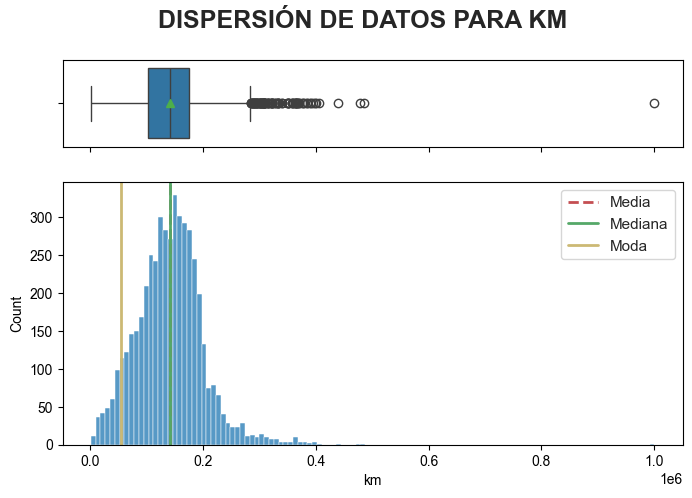

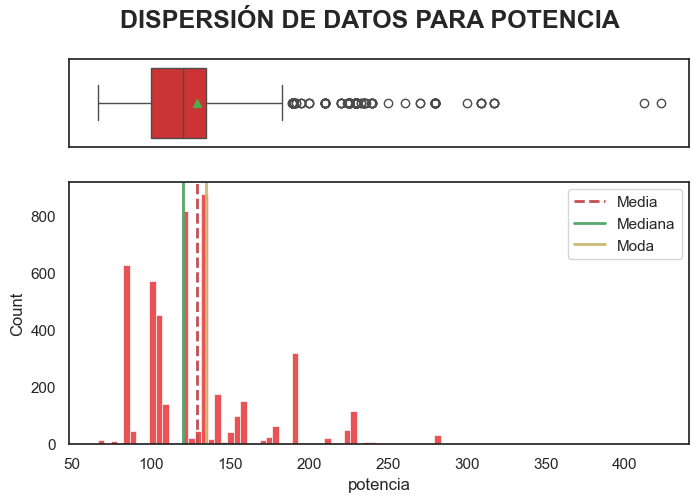

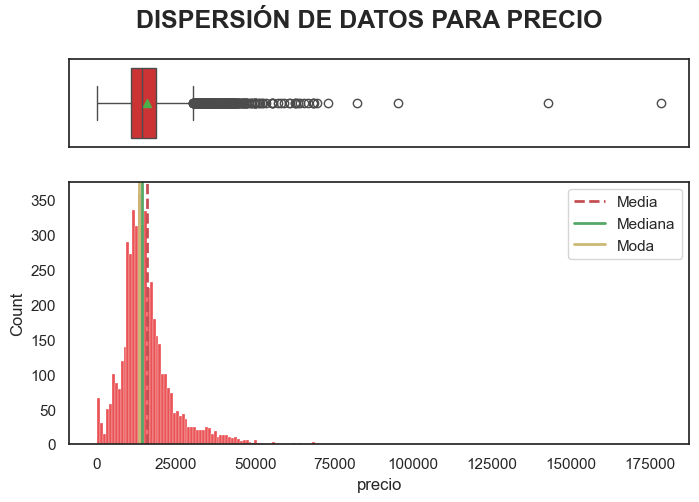

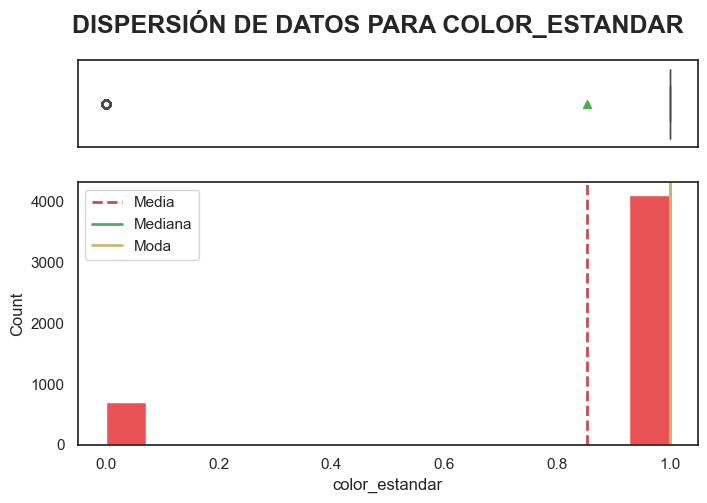

In [90]:
for i in range(len(list_col)):
    dist_box(df_bmw[list_col[i]])

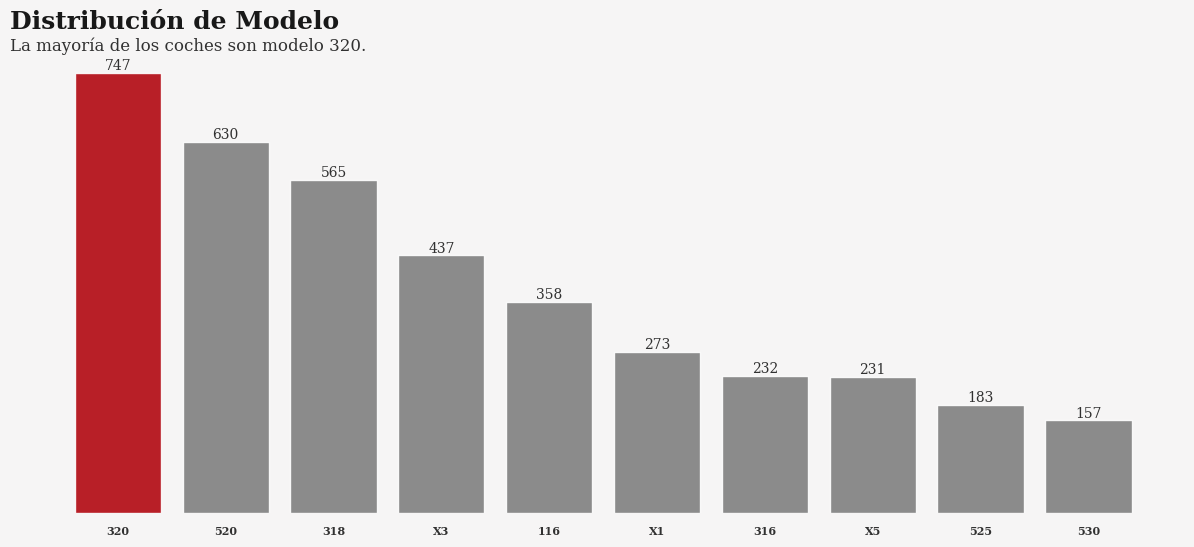

In [91]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Seleccionar los 10 modelos más comunes
a = df_bmw['modelo'].value_counts().head(10)

colors = ['#b20710'] + ['grey']*(len(a)-1)
ax.bar(x=a.index, height=a.values, color=colors, alpha=0.9)

# Añadir texto con el valor encima de cada barra
for i, v in enumerate(a.values):
    ax.text(i, v + 5, str(v), ha='center', fontdict={'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha=0.8)

ax.text(-1, max(a.values) + max(a.values)*0.1, 'Distribución de Modelo', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 18, 'weight':'bold'}, alpha=0.9)
ax.text(-1, max(a.values) + max(a.values)*0.05, 'La mayoría de los coches son modelo 320.', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 12}, alpha=0.8)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

ax.set_xticklabels(a.index, fontdict={'font': 'serif', 'color': 'black', 'fontsize': 8, 'weight':'bold'}, alpha=0.8)
ax.axes.get_yaxis().set_visible(False)

plt.show()

### **5.2 CORRELACIÓN INCIAL**

In [92]:
df_bmw

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,años_coche,color_estandar
0,118,140411.0,100.0,coupe,True,True,False,True,True,False,11300.0,4-6,1.0
1,M4,13929.0,317.0,convertible,True,True,False,False,True,True,69700.0,1-3,1.0
2,320,183297.0,120.0,sedan,False,False,False,True,False,False,10200.0,4-6,1.0
3,420,128035.0,135.0,convertible,True,True,False,True,True,False,25100.0,4-6,0.0
4,425,97097.0,160.0,coupe,True,True,False,False,True,True,33400.0,4-6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,218 Gran Tourer,39743.0,110.0,van,False,True,False,False,False,False,14600.0,1-3,1.0
4813,218 Active Tourer,49832.0,100.0,van,False,True,False,False,False,True,17500.0,1-3,1.0
4814,218 Gran Tourer,19633.0,110.0,van,False,True,False,False,False,True,17000.0,1-3,1.0
4815,218 Active Tourer,27920.0,110.0,van,True,True,False,False,False,True,22700.0,1-3,0.0


In [93]:
corr = df_bmw.corr(numeric_only=True)  
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,color_estandar
km,1.000000,-0.049208,-0.002052,-0.037989,-0.041008,-0.409000,0.000631
potencia,-0.049208,1.000000,0.186766,0.224847,0.512004,0.640120,0.036434
aire_acondicionado,-0.002052,0.186766,1.000000,0.106088,0.218543,0.240665,0.003870
bluetooth,-0.037989,0.224847,0.106088,1.000000,0.097325,0.198700,0.040935
alerta_lim_velocidad,-0.041008,0.512004,0.218543,0.097325,1.000000,0.449259,0.024926
precio,-0.409000,0.640120,0.240665,0.198700,0.449259,1.000000,0.031337
color_estandar,0.000631,0.036434,0.003870,0.040935,0.024926,0.031337,1.000000


### **5.3 VARIABLES VS TARGET (`PRECIO`)** 

## **06 - TRANSFORMACIÓN DE VARIABLES**

### **6.1 - CODIFICACIÓN DE VARIABLES**

### **6.2 - ESCALADO (MINMAXSCALER)**

### **6.3 - CORRELACIÓN FINAL**

## **07 - DATASET FINAL**

### **7.1 - INFO()**

### **7.2 - EXPORTACIÓN DE PRIMERAS 50 FILAS A EXCEL**

In [94]:
#vamos a estudiar la correlacion entre precio y el color del coche para las filas que no tienen nulos
media_precio_color = df_bmw.groupby('color_estandar')['precio'].mean().sort_values(ascending=False)

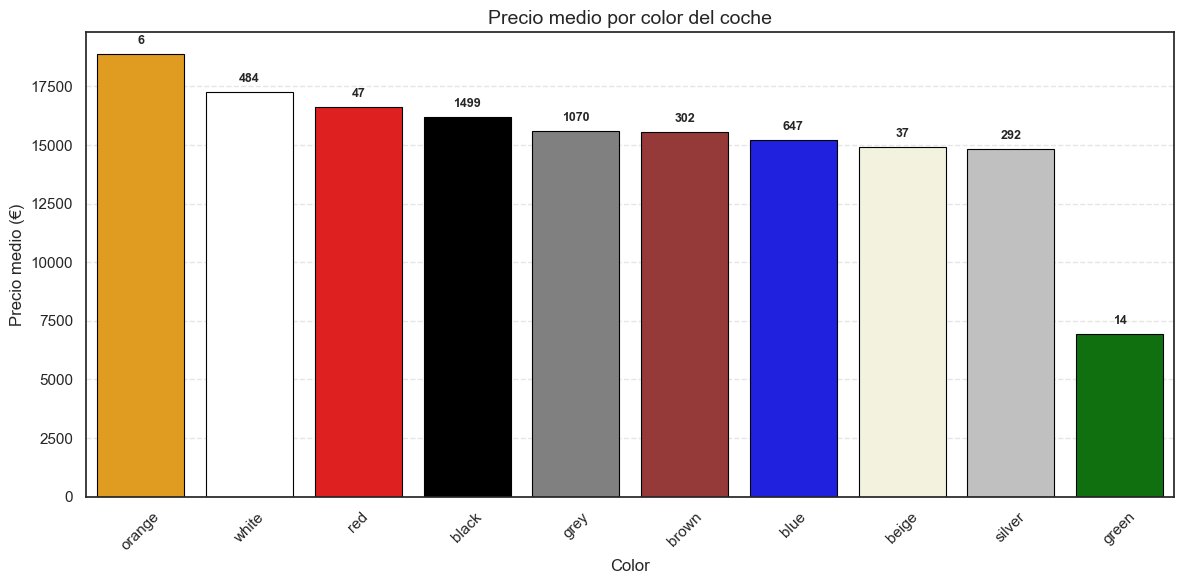

In [95]:
# Precio medio por color (sin nulos)
media_precio_color = (
    bmw.groupby('color')['precio']
    .mean()
    .sort_values(ascending=False)
)

# Conteo de coches por color
conteo_color = bmw['color'].value_counts()
conteo_color = conteo_color.reindex(media_precio_color.index)

# Lista de colores: 'lightgrey' para 'desconocido'
colores_barras = [
    'lightgrey' if c.lower() == 'desconocido' else c.lower()
    for c in media_precio_color.index
]

# Gráfico
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=media_precio_color.index,
    y=media_precio_color.values,
    palette=colores_barras,
    edgecolor='black',   # Borde negro
    linewidth=0.8         # Grosor del borde
)

# Etiquetas con el número de coches
for i, (y_barra, n_coches) in enumerate(zip(media_precio_color.values, conteo_color.values)):
    ax.text(
        i, y_barra + 300,
        f'{n_coches}',
        ha='center', va='bottom',
        fontsize=9, weight='bold'
    )

plt.xticks(rotation=45)
plt.title('Precio medio por color del coche', fontsize=14)
plt.xlabel('Color')
plt.ylabel('Precio medio (€)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()